## Install libraries

In [24]:
! pip install seaborn
! pip install matplotlib
! pip install statsmodels
! pip install wordcloud

## 1. Import Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [26]:
file_path = r"C:\Users\Sameer_Subudhi\Desktop\Me\Research\ML\flight-price-prediction\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-18,Delhi,Cochin,02:15:00,19:00:00,1005,1.0,No Info,15554
1,Air India,2019-03-24,Mumbai,Hyderabad,19:30:00,20:45:00,75,0.0,No Info,2575
2,Jet Airways,2019-03-24,Kolkata,Banglore,06:30:00,16:20:00,590,1.0,In-flight meal not included,8824
3,Air India,2019-03-03,Delhi,Cochin,07:05:00,19:15:00,2170,2.0,No Info,11762
4,Multiple Carriers,2019-03-03,Delhi,Cochin,10:20:00,01:35:00,915,1.0,No Info,15147
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,09:50:00,08:55:00,1385,2.0,No Info,13227
636,Air India,2019-03-03,Banglore,New Delhi,06:55:00,13:20:00,385,1.0,No Info,10924
637,Jet Airways,2019-05-21,Delhi,Cochin,05:30:00,19:00:00,810,2.0,In-flight meal not included,13029
638,Vistara,2019-06-01,Delhi,Cochin,14:40:00,17:50:00,190,0.0,No Info,6741


### 2.1 Fixing Data Types

In [27]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [28]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [29]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-18,Delhi,Cochin,2024-07-15 02:15:00,2024-07-15 19:00:00,1005,1.0,No Info,15554
1,Air India,2019-03-24,Mumbai,Hyderabad,2024-07-15 19:30:00,2024-07-15 20:45:00,75,0.0,No Info,2575
2,Jet Airways,2019-03-24,Kolkata,Banglore,2024-07-15 06:30:00,2024-07-15 16:20:00,590,1.0,In-flight meal not included,8824
3,Air India,2019-03-03,Delhi,Cochin,2024-07-15 07:05:00,2024-07-15 19:15:00,2170,2.0,No Info,11762
4,Multiple Carriers,2019-03-03,Delhi,Cochin,2024-07-15 10:20:00,2024-07-15 01:35:00,915,1.0,No Info,15147
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-07-15 09:50:00,2024-07-15 08:55:00,1385,2.0,No Info,13227
636,Air India,2019-03-03,Banglore,New Delhi,2024-07-15 06:55:00,2024-07-15 13:20:00,385,1.0,No Info,10924
637,Jet Airways,2019-05-21,Delhi,Cochin,2024-07-15 05:30:00,2024-07-15 19:00:00,810,2.0,In-flight meal not included,13029
638,Vistara,2019-06-01,Delhi,Cochin,2024-07-15 14:40:00,2024-07-15 17:50:00,190,0.0,No Info,6741


## 3. High-level Summary of Data

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [31]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,627.195312,0.810937,9126.312500
std,491.627619,0.669154,4433.342528
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5678.000000
50%,510.000000,1.000000,8581.500000
75%,910.000000,1.000000,12357.250000
max,2315.000000,3.000000,31825.000000


In [32]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,238,280,280,337.0,498


## 4. High-level analysis of Missing Values

In [33]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [34]:
temp = pd.read_csv(r"C:\Python Programs\datasets\titanic.csv")

eda_helper_functions.missing_info(temp)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Python Programs\\datasets\\titanic.csv'

In [35]:
eda_helper_functions.plot_missing_info(temp)

NameError: name 'temp' is not defined

## 5. High-level analysis of Outliers

In [36]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [37]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-03-24,Mumbai,Hyderabad,2024-07-15 19:30:00,2024-07-15 20:45:00,75,0.0,No Info,2575,-1
3,Air India,2019-03-03,Delhi,Cochin,2024-07-15 07:05:00,2024-07-15 19:15:00,2170,2.0,No Info,11762,-1
6,Indigo,2019-06-03,Delhi,Cochin,2024-07-15 07:35:00,2024-07-15 12:10:00,275,1.0,No Info,6069,-1
12,Vistara,2019-03-06,Mumbai,Hyderabad,2024-07-15 20:55:00,2024-07-15 16:45:00,1190,1.0,No Info,12395,-1
17,Indigo,2019-06-24,Chennai,Kolkata,2024-07-15 11:35:00,2024-07-15 14:00:00,145,0.0,No Info,3858,-1
...,...,...,...,...,...,...,...,...,...,...,...
633,Indigo,2019-05-01,Chennai,Kolkata,2024-07-15 19:35:00,2024-07-15 21:55:00,140,0.0,No Info,3597,-1
634,Spicejet,2019-06-27,Chennai,Kolkata,2024-07-15 17:45:00,2024-07-15 20:05:00,140,0.0,No Info,3597,-1
635,Air India,2019-05-06,Kolkata,Banglore,2024-07-15 09:50:00,2024-07-15 08:55:00,1385,2.0,No Info,13227,-1
637,Jet Airways,2019-05-21,Delhi,Cochin,2024-07-15 05:30:00,2024-07-15 19:00:00,810,2.0,In-flight meal not included,13029,-1


## 6. Pair Plots

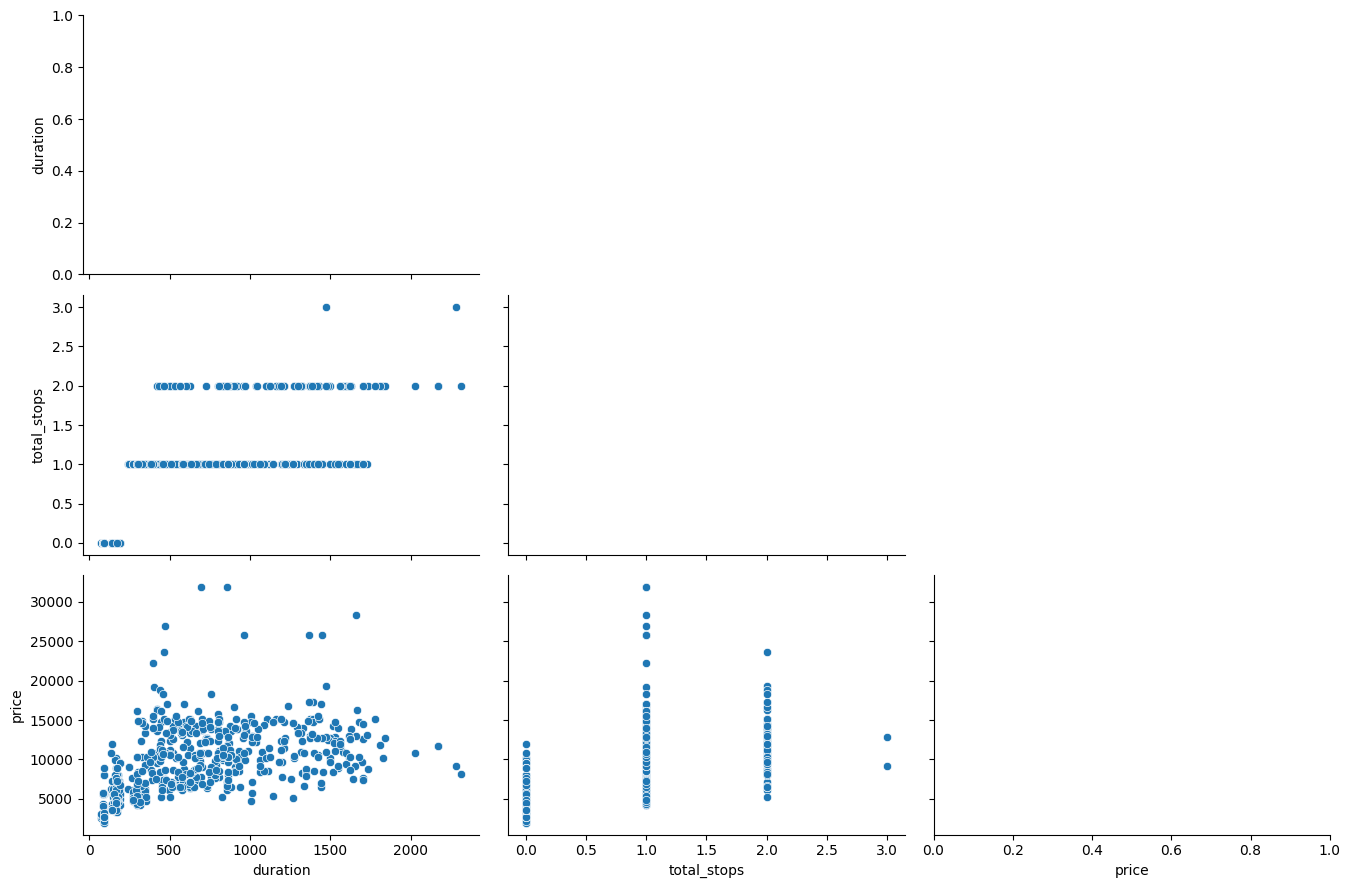

In [38]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

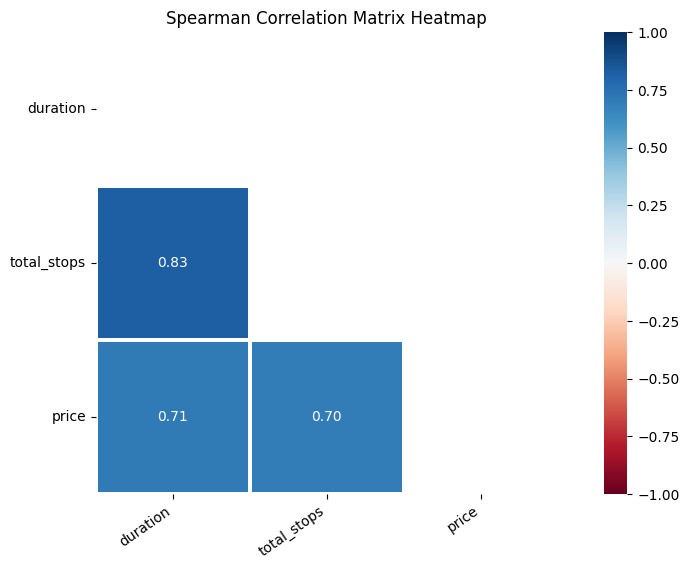

In [39]:
eda_helper_functions.correlation_heatmap(train)

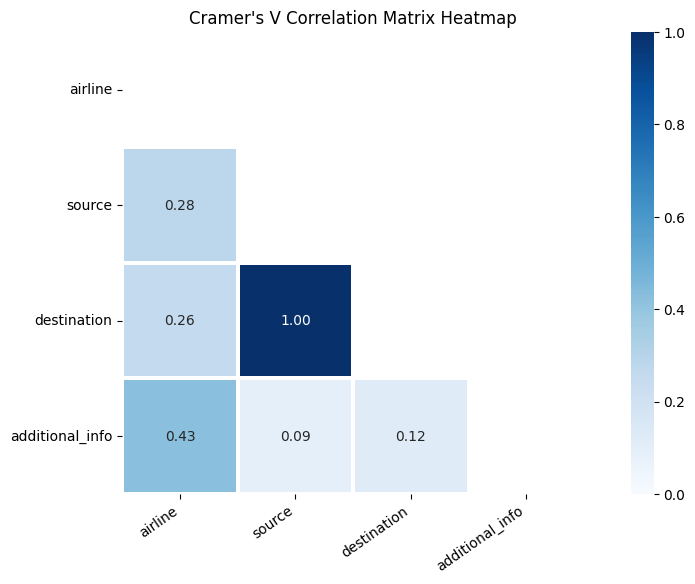

In [40]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [41]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [42]:
train.airline

0            Jet Airways
1              Air India
2            Jet Airways
3              Air India
4      Multiple Carriers
             ...        
635            Air India
636            Air India
637          Jet Airways
638              Vistara
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [43]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1              Air India
2            Jet Airways
3              Air India
4      Multiple Carriers
             ...        
635            Air India
636            Air India
637          Jet Airways
638              Vistara
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,238


,count,percentage
category,,
Jet Airways,238,0.371875
Indigo,114,0.178125
Air India,109,0.170313
Multiple Carriers,79,0.123438
Spicejet,50,0.078125
Vistara,30,0.046875
Air Asia,11,0.017188
Goair,9,0.014063


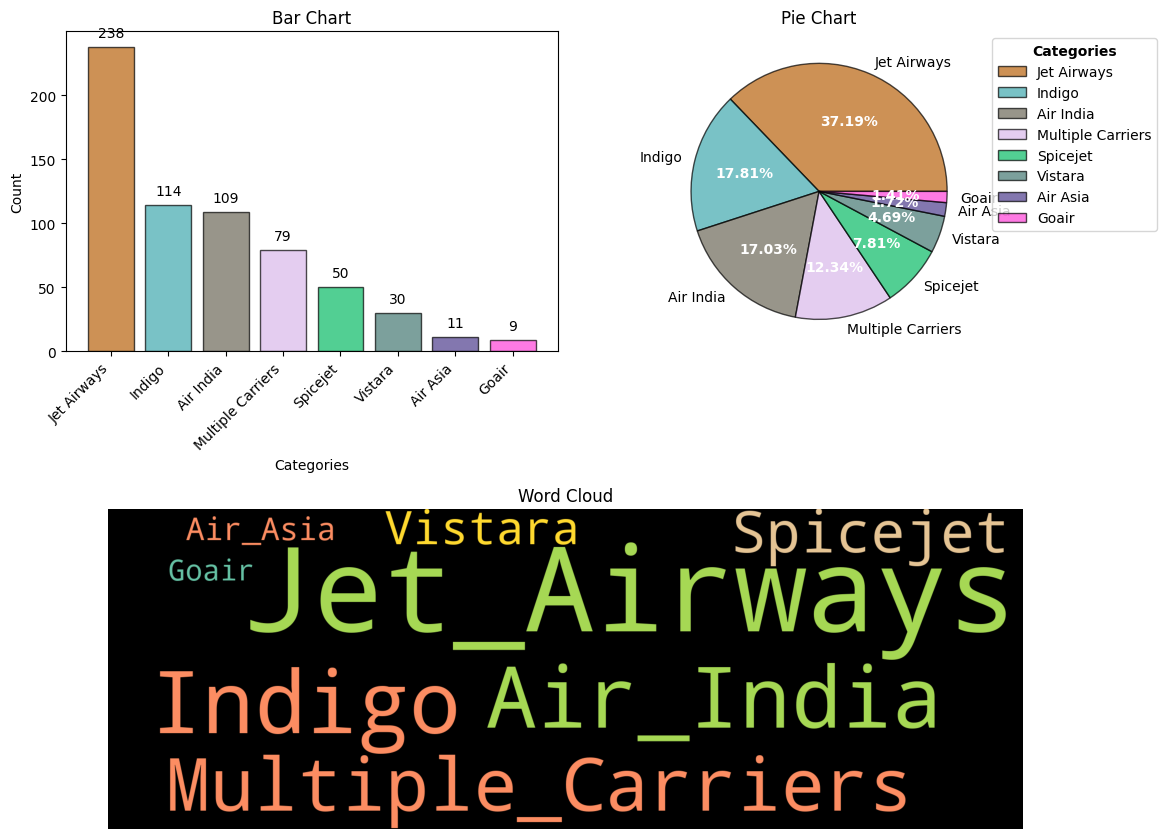

In [44]:
eda_helper_functions.cat_univar_plots(train, "airline")

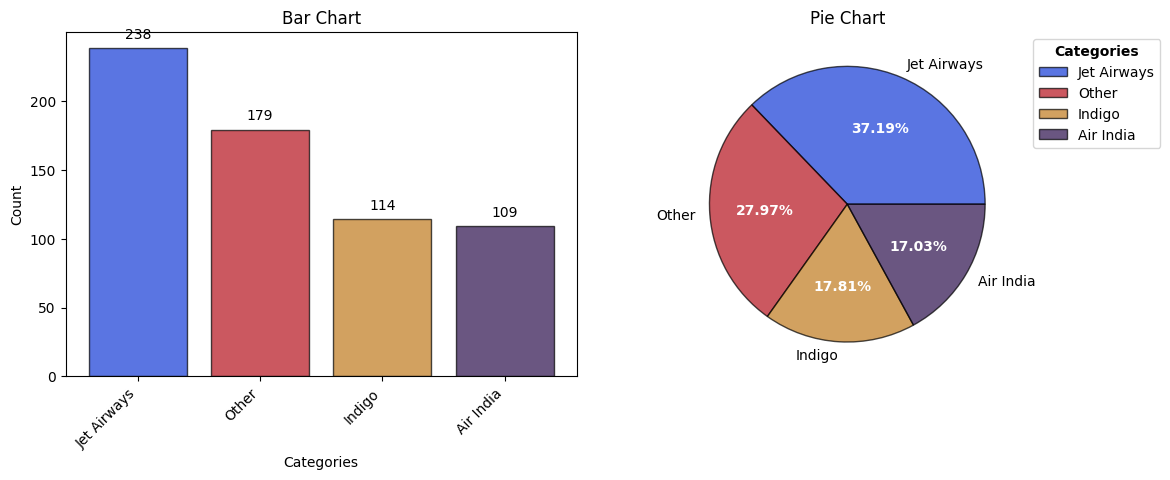

In [45]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

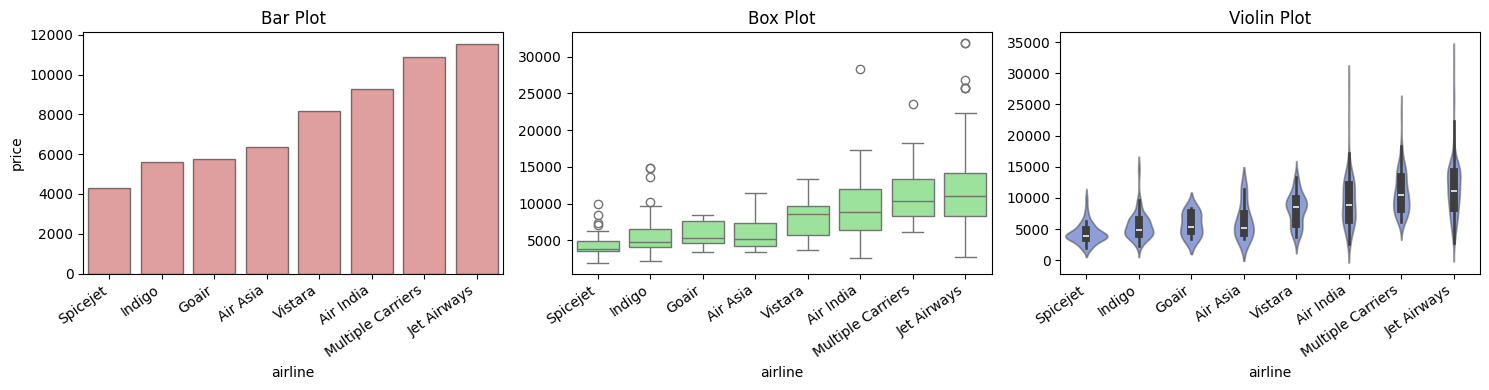

In [46]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [47]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 49.62047738482086
- p-value              : 3.203173804414471e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 276.24593712228676
- p-value              : 7.094470399977124e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


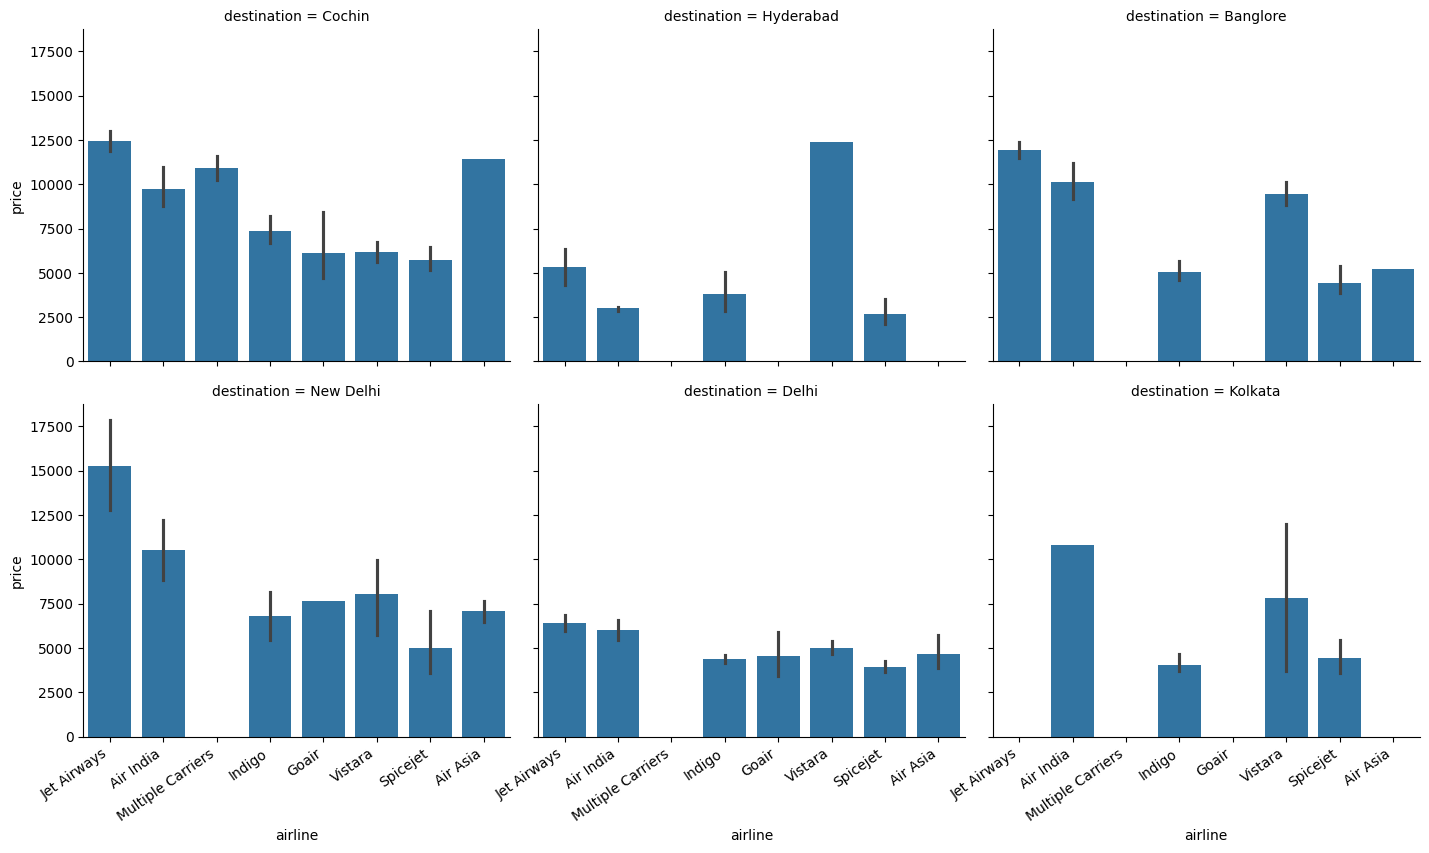

In [48]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [49]:
train.date_of_journey

0     2019-05-18
1     2019-03-24
2     2019-03-24
3     2019-03-03
4     2019-03-03
         ...    
635   2019-05-06
636   2019-03-03
637   2019-05-21
638   2019-06-01
639   2019-03-24
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

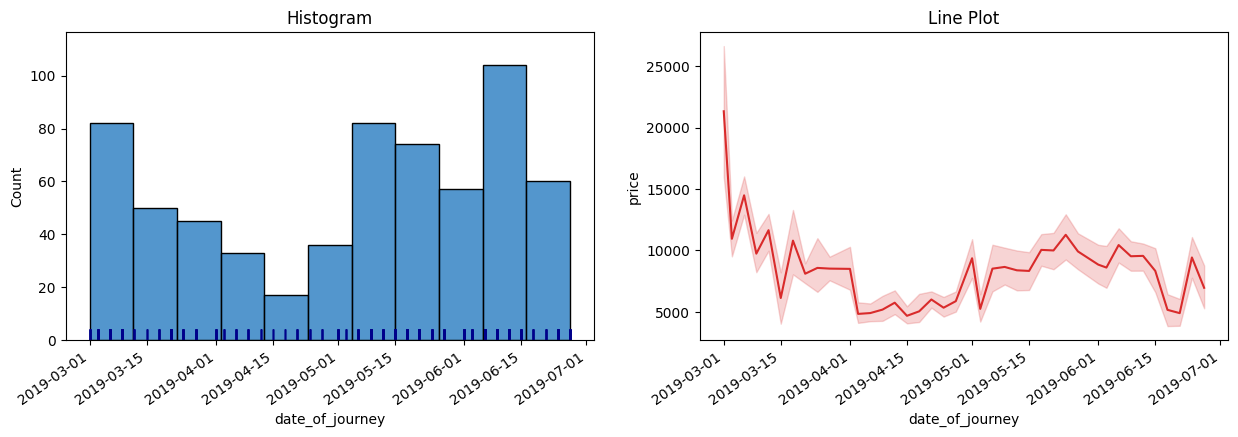

In [50]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

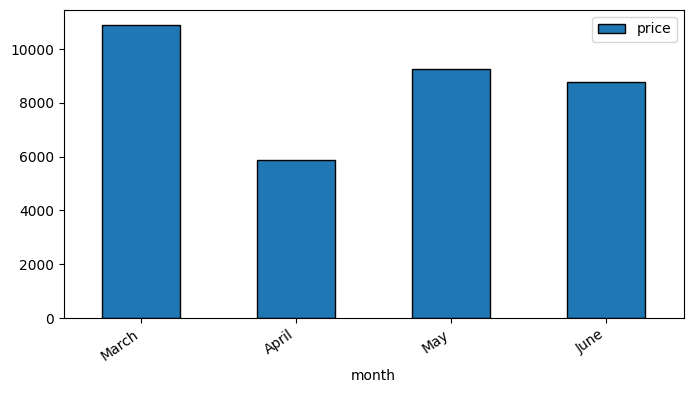

In [51]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

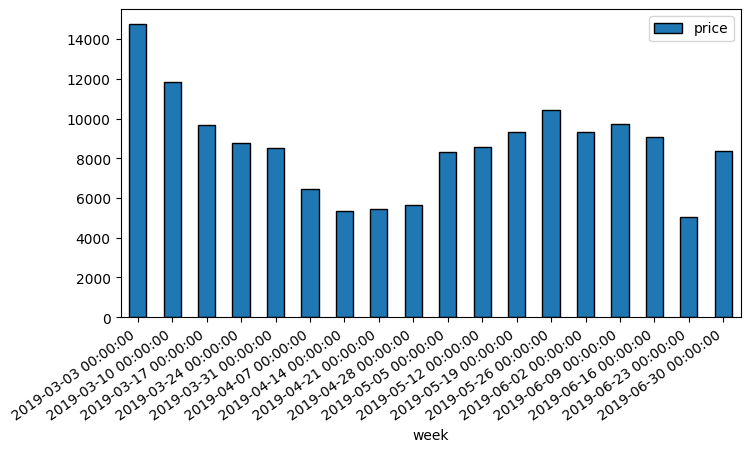

In [52]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

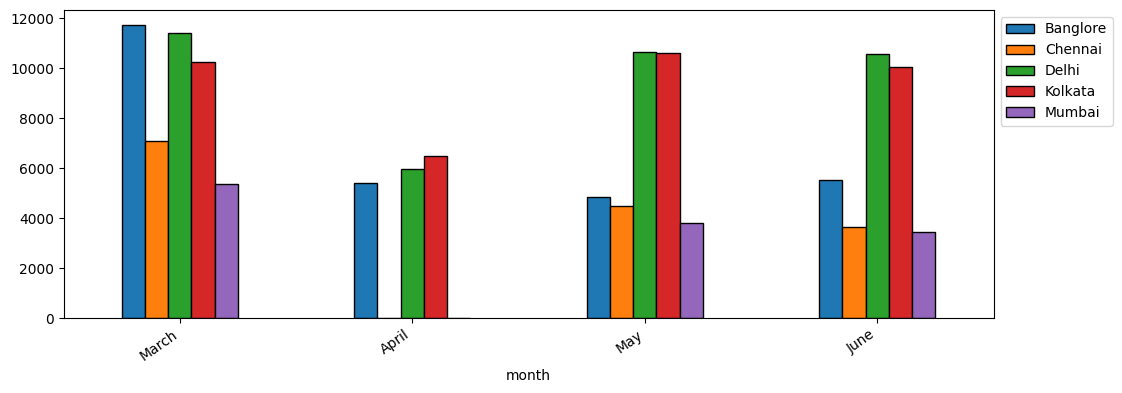

In [53]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [54]:
train.dep_time

0     2024-07-15 02:15:00
1     2024-07-15 19:30:00
2     2024-07-15 06:30:00
3     2024-07-15 07:05:00
4     2024-07-15 10:20:00
              ...        
635   2024-07-15 09:50:00
636   2024-07-15 06:55:00
637   2024-07-15 05:30:00
638   2024-07-15 14:40:00
639   2024-07-15 11:10:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

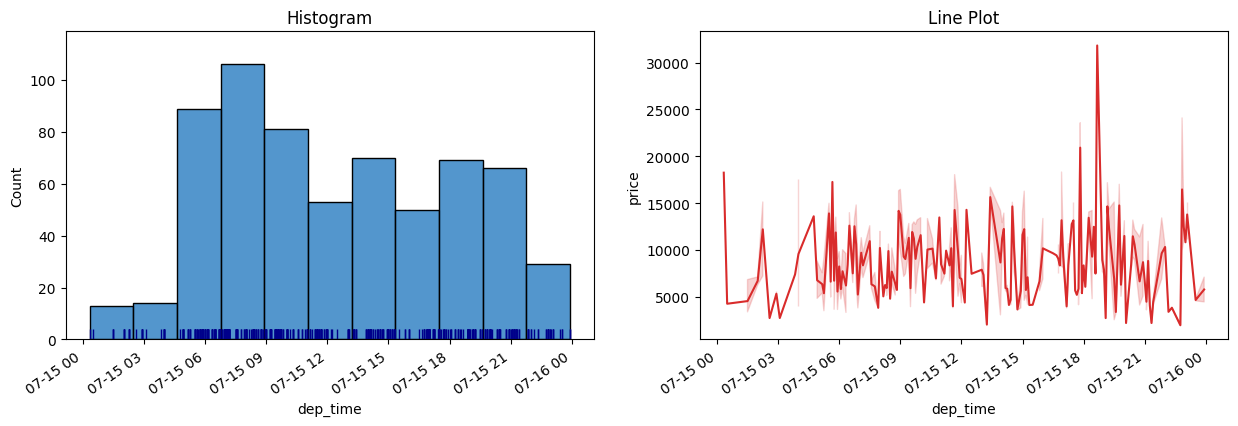

In [55]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

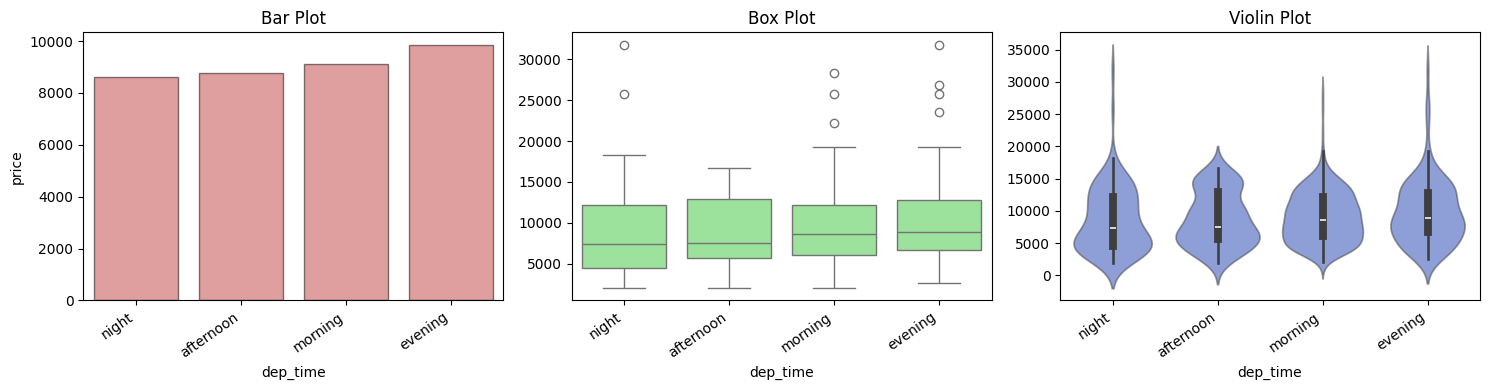

In [56]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [57]:
train.duration

0      1005
1        75
2       590
3      2170
4       915
       ... 
635    1385
636     385
637     810
638     190
639     175
Name: duration, Length: 640, dtype: int64

In [58]:
eda_helper_functions.num_summary(train, "duration")

0      1005
1        75
2       590
3      2170
4       915
       ... 
635    1385
636     385
637     810
638     190
639     175
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,150.0
25,175.0
50,510.0
75,910.0
90,1425.0
95,1595.0
99,1822.2


,value
mean,627.195312
trimmed mean (5%),594.184028
trimmed mean (10%),566.582031
median,510.000000


,value
var,241697.716097
std,491.627619
IQR,735.000000
mad,340.000000
coef_variance,0.783851


,value
skewness,0.877720
kurtosis,-0.102602


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.997069503077181e-21
Test Statistic       : 0.8891611440121611
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.971249204635342
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [59]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    510.0
0.75    910.0
Name: duration, dtype: float64

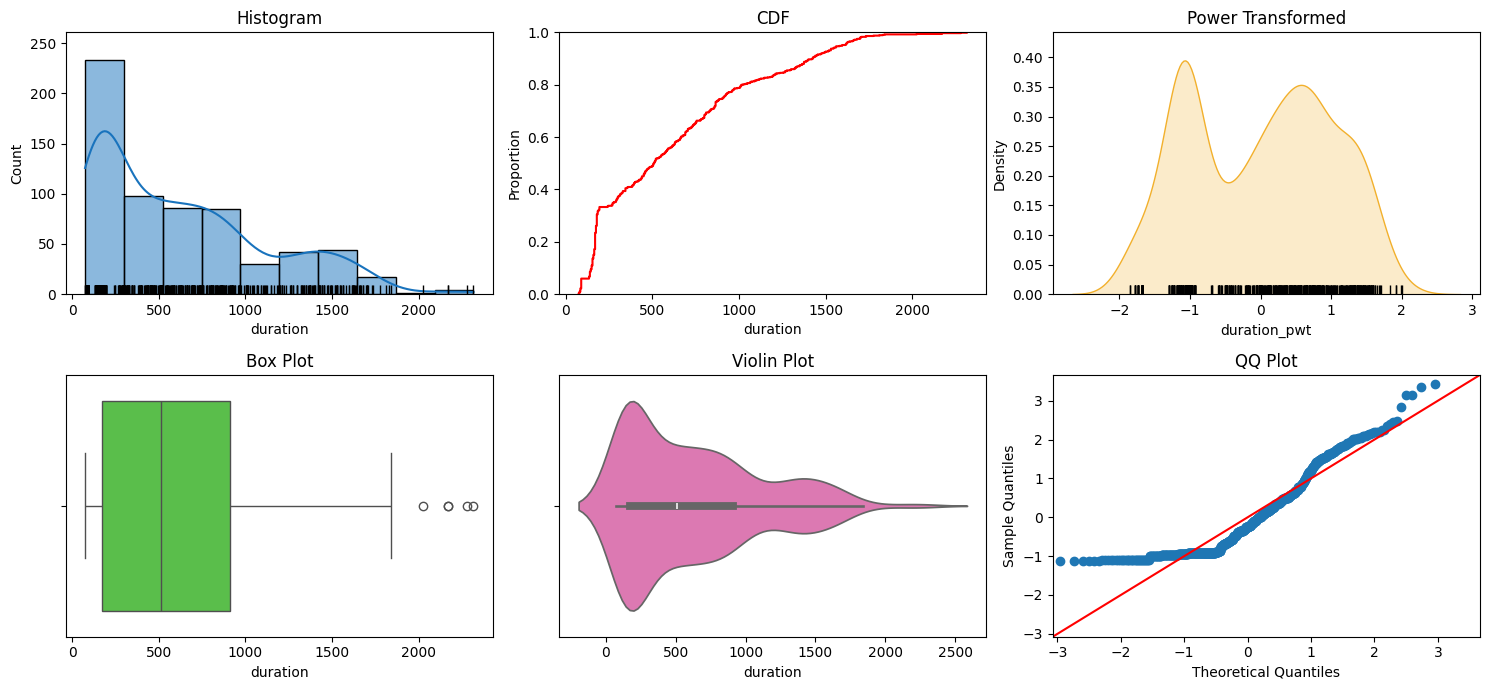

In [60]:
eda_helper_functions.num_univar_plots(train, "duration")

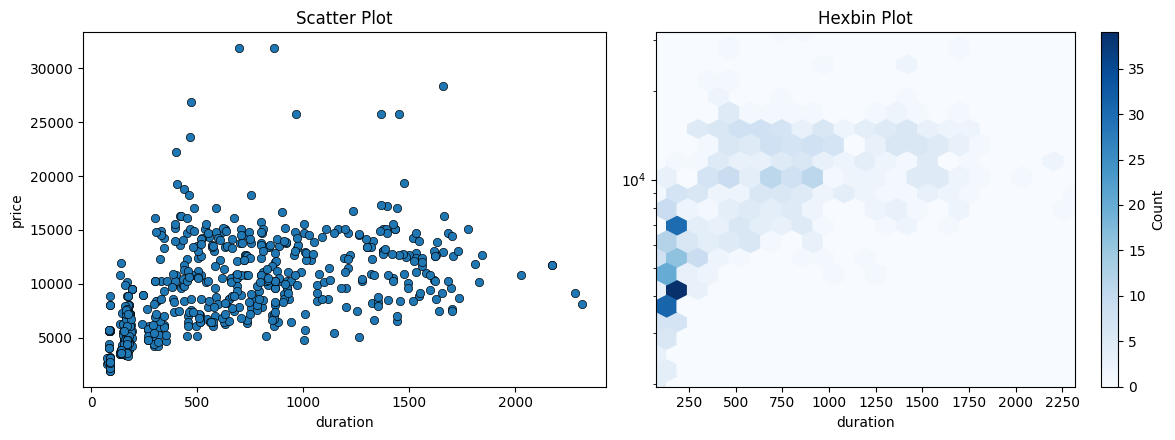

In [61]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [62]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.546722377916617
- p-value              : 3.653978279782822e-51
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7059045911079489
- p-value              : 1.233799260020631e-97
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


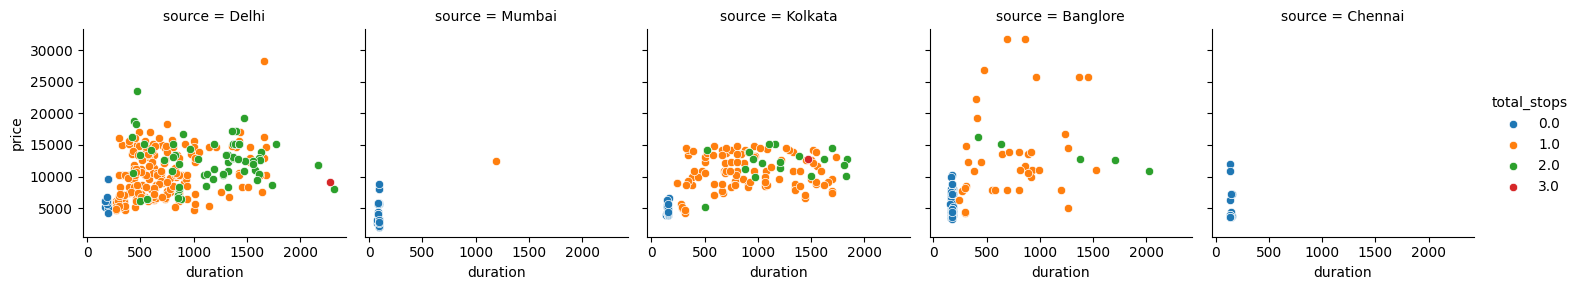

In [63]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

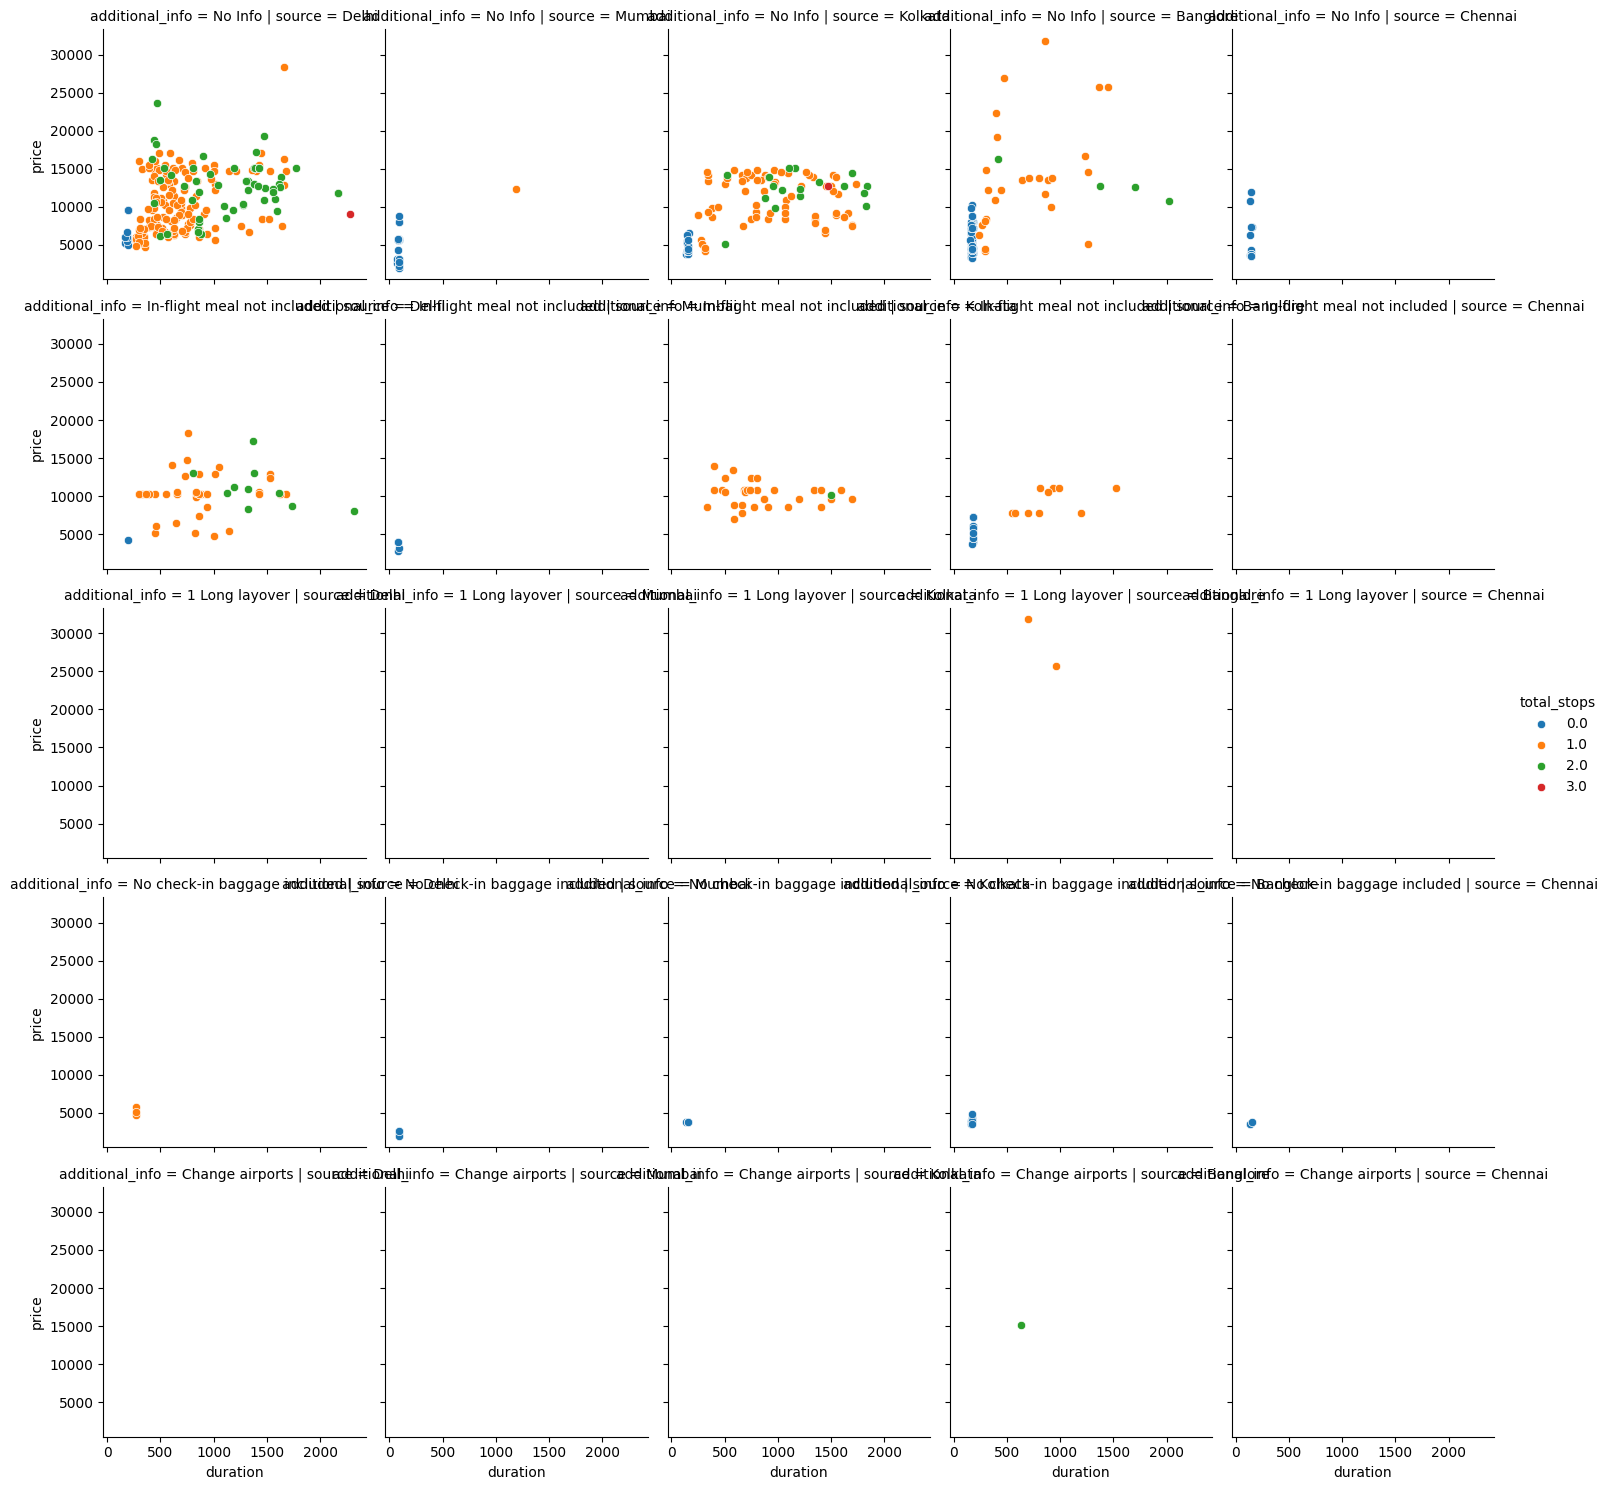

In [64]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [65]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -927.5
Upper Limit : 2012.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
279,Air India,2019-03-18,Banglore,New Delhi,2024-07-15 06:45:00,2024-07-15 16:30:00,2025,2.0,No Info,10835
3,Air India,2019-03-03,Delhi,Cochin,2024-07-15 07:05:00,2024-07-15 19:15:00,2170,2.0,No Info,11762
331,Air India,2019-03-09,Delhi,Cochin,2024-07-15 07:05:00,2024-07-15 19:15:00,2170,2.0,No Info,11762
140,Air India,2019-03-21,Delhi,Cochin,2024-07-15 05:15:00,2024-07-15 19:15:00,2280,3.0,No Info,9128
588,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-15 05:10:00,2024-07-15 19:45:00,2315,2.0,In-flight meal not included,8098


### 8.5 additional_info

In [66]:
eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2      In-flight meal not included
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637    In-flight meal not included
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,498


,count,percentage
category,,
No Info,498,0.778125
In-flight meal not included,115,0.179688
No check-in baggage included,24,0.037500
1 Long layover,2,0.003125
Change airports,1,0.001563


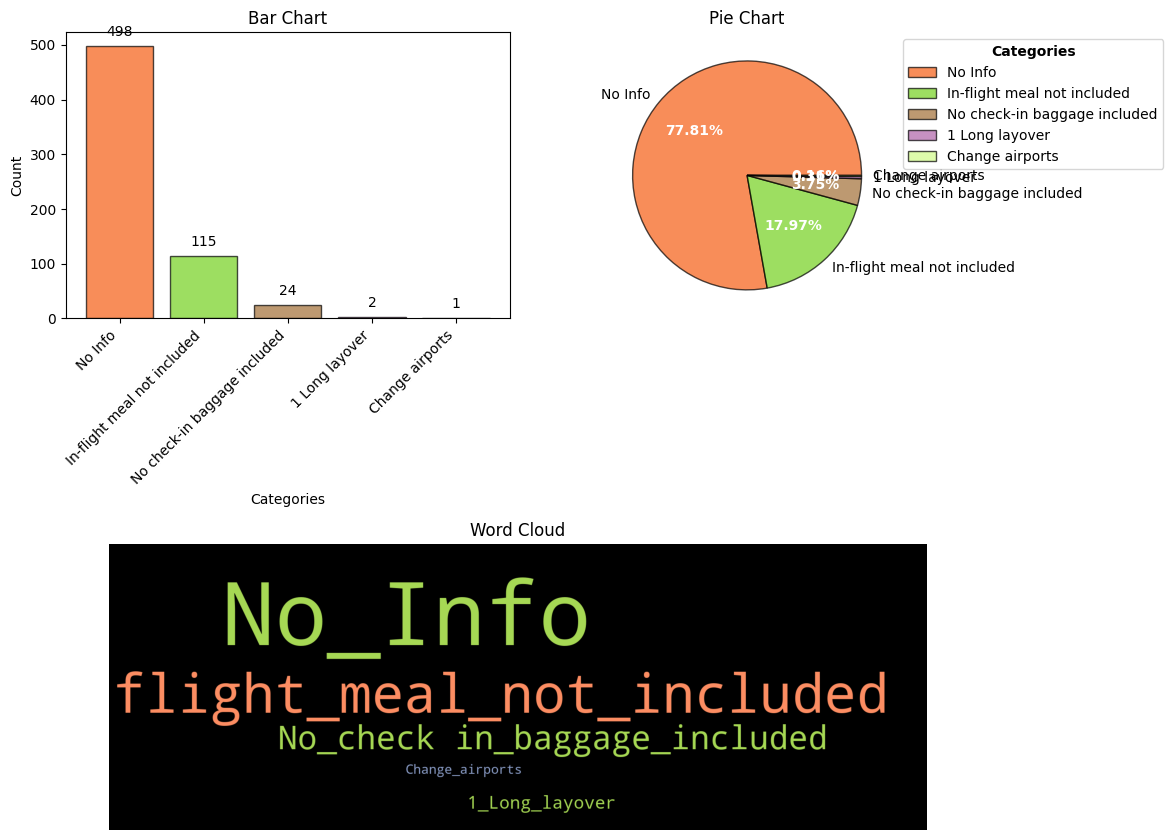

In [67]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

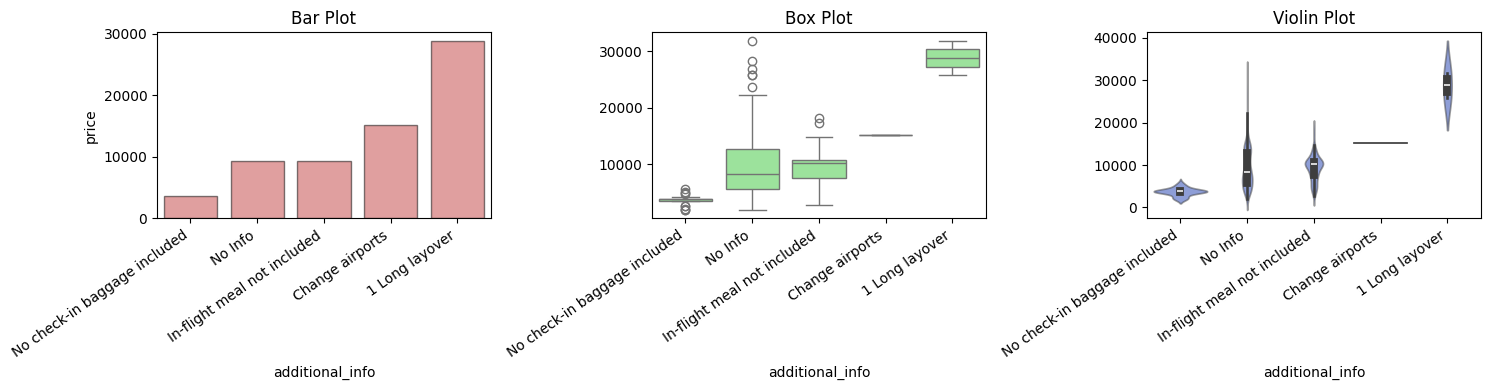

In [68]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

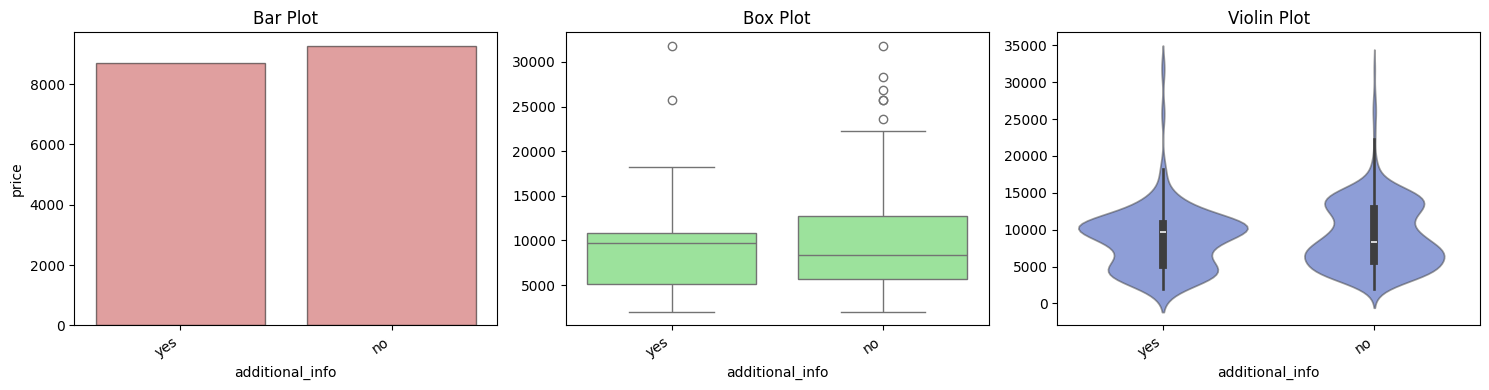

In [69]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [70]:
# from ydata_profiling import ProfileReport

In [71]:
# report = ProfileReport(train)

In [72]:
# report.to_file(output_file="output.html")